In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset=pd.read_csv("titanic.csv")
print(dataset.describe())
print(dataset.info())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
print(dataset.age)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64


In [38]:
print(dataset.isnull().sum())
dataset['age'].fillna(dataset['age'].median(), inplace=True)         # Fill age with median
dataset['embarked'].fillna(dataset['embarked'].mode()[0], inplace=True)
dataset['embark_town'].fillna(dataset['embark_town'].mode()[0], inplace=True)
dataset.drop(columns=['embark_town'],inplace=True)


survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


/var/folders/xl/h9j8q_fx73n657dzpml67x600000gn/T/ipykernel_36507/3127586678.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['age'].fillna(dataset['age'].median(), inplace=True)         # Fill age with median
/var/folders/xl/h9j8q_fx73n657dzpml67x600000gn/T/ipykernel_36507/3127586678.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate

In [40]:
print(dataset.duplicated().sum())
dataset.drop_duplicates(inplace=True)

1


In [41]:
dataset = pd.get_dummies(dataset, columns=['sex', 'embarked'], drop_first=True)

In [42]:
summary_stats = dataset.describe()

median = dataset.median(numeric_only=True)
std = dataset.std(numeric_only=True)

print(" Summary Stats:\n", summary_stats)
print(" Medians:\n", median)
print(" Standard Deviations:\n", std)

 Summary Stats:
          survived      pclass         age       sibsp       parch        fare
count  200.000000  200.000000  200.000000  200.000000  200.000000  200.000000
mean     0.665000    1.200000   34.957100    0.450000    0.445000   76.340334
std      0.473175    0.530478   15.093316    0.632058    0.734625   75.077603
min      0.000000    1.000000    0.920000    0.000000    0.000000    0.000000
25%      0.000000    1.000000   25.000000    0.000000    0.000000   28.659375
50%      1.000000    1.000000   33.500000    0.000000    0.000000   55.000000
75%      1.000000    1.000000   47.000000    1.000000    1.000000   90.000000
max      1.000000    3.000000   80.000000    3.000000    4.000000  512.329200
 Medians:
 survived       1.0
pclass         1.0
age           33.5
sibsp          0.0
parch          0.0
fare          55.0
adult_male     0.0
alone          0.0
sex_male       1.0
embarked_Q     0.0
embarked_S     1.0
dtype: float64
 Standard Deviations:
 survived       0.473175

In [43]:
correlation = dataset.corr(numeric_only=True)
print(" Correlation Matrix:\n", correlation)

 Correlation Matrix:
             survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.032032 -0.223664  0.136939  0.040695  0.125657   
pclass     -0.032032  1.000000 -0.288255 -0.089924  0.054158 -0.313394   
age        -0.223664 -0.288255  1.000000 -0.137071 -0.242168 -0.071553   
sibsp       0.136939 -0.089924 -0.137071  1.000000  0.259197  0.290475   
parch       0.040695  0.054158 -0.242168  0.259197  1.000000  0.384043   
fare        0.125657 -0.313394 -0.071553  0.290475  0.384043  1.000000   
adult_male -0.589766 -0.128514  0.302394 -0.199066 -0.205459 -0.125322   
alone      -0.167155  0.056980  0.172804 -0.645608 -0.549298 -0.305447   
sex_male   -0.541028 -0.060583  0.158678 -0.154130 -0.111694 -0.135909   
embarked_Q -0.049940  0.148486 -0.016198  0.067976 -0.086753 -0.050198   
embarked_S -0.112997  0.145674 -0.096233 -0.009913  0.071644 -0.228008   

            adult_male     alone  sex_male  embarked_Q  embarked_S  
survived     -0.5897

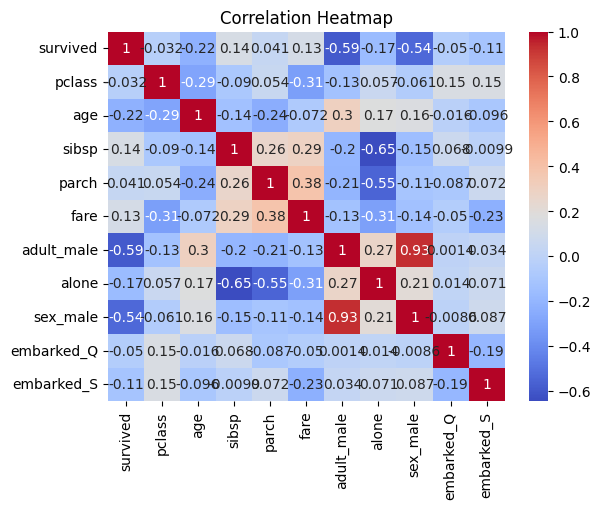

In [47]:
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [48]:
agebysurvival = dataset.groupby("survived")["age"].mean()
print("Average Age by Survival:\n", agebysurvival)

Average Age by Survival:
 survived
0    30.626179
1    28.343690
Name: age, dtype: float64


In [49]:
survival_rate = dataset["survived"].mean() * 100
print(f"Percentage Survived: {survival_rate:.2f}%")

Percentage Survived: 38.38%


In [53]:
susviverategender=dataset.groupby('sex')["survived"].mean() * 100
print(f"Percentage Survived: {susviverategender}")

Percentage Survived: sex
female    74.203822
male      18.890815
Name: survived, dtype: float64%


In [54]:
susviverateclass=dataset.groupby('pclass')["survived"].mean() * 100
print(f"Percentage Survived: {susviverateclass}")

Percentage Survived: pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


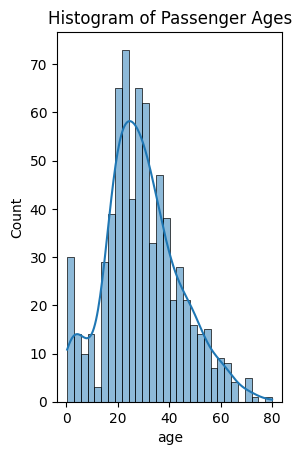

In [55]:
plt.subplot(1, 2, 1)
sns.histplot(dataset['age'].dropna(), bins=30, kde=True)
plt.title("Histogram of Passenger Ages")
plt.show()

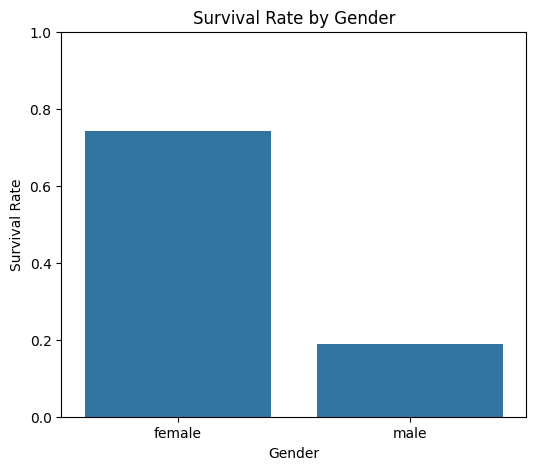

In [60]:
surviverategender=dataset.groupby('sex')["survived"].mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(x='sex', y='survived', data=surviverategender)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Rate")
plt.xlabel("Gender")
plt.ylim(0, 1)
plt.show()

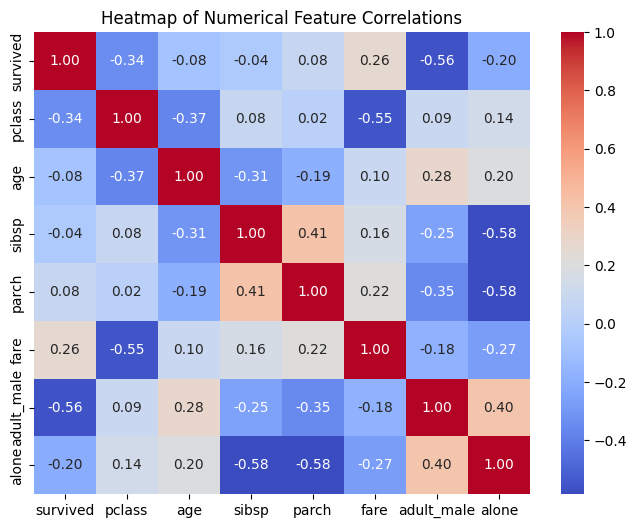

In [61]:
corr = dataset.corr(numeric_only=True)


plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Numerical Feature Correlations")
plt.show()

In [26]:
with open("titanic.csv",'w') as f:
    f.write('''survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.25,S,Third,man,True,,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
1,3,female,26.0,0,0,7.925,S,Third,woman,False,,Southampton,yes,True
1,1,female,35.0,1,0,53.1,S,First,woman,False,C,Southampton,yes,False
0,3,male,35.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,8.4583,Q,Third,man,True,,Queenstown,no,True
0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
0,3,male,2.0,3,1,21.075,S,Third,child,False,,Southampton,no,False
1,3,female,27.0,0,2,11.1333,S,Third,woman,False,,Southampton,yes,False
1,2,female,14.0,1,0,30.0708,C,Second,child,False,,Cherbourg,yes,False
1,3,female,4.0,1,1,16.7,S,Third,child,False,G,Southampton,yes,False
1,1,female,58.0,0,0,26.55,S,First,woman,False,C,Southampton,yes,True
0,3,male,20.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,39.0,1,5,31.275,S,Third,man,True,,Southampton,no,False
0,3,female,14.0,0,0,7.8542,S,Third,child,False,,Southampton,no,True
1,2,female,55.0,0,0,16.0,S,Second,woman,False,,Southampton,yes,True
0,3,male,2.0,4,1,29.125,Q,Third,child,False,,Queenstown,no,False
1,2,male,,0,0,13.0,S,Second,man,True,,Southampton,yes,True
0,3,female,31.0,1,0,18.0,S,Third,woman,False,,Southampton,no,False
1,3,female,,0,0,7.225,C,Third,woman,False,,Cherbourg,yes,True
0,2,male,35.0,0,0,26.0,S,Second,man,True,,Southampton,no,True
1,2,male,34.0,0,0,13.0,S,Second,man,True,D,Southampton,yes,True
1,3,female,15.0,0,0,8.0292,Q,Third,child,False,,Queenstown,yes,True
1,1,male,28.0,0,0,35.5,S,First,man,True,A,Southampton,yes,True
0,3,female,8.0,3,1,21.075,S,Third,child,False,,Southampton,no,False
1,3,female,38.0,1,5,31.3875,S,Third,woman,False,,Southampton,yes,False
0,3,male,,0,0,7.225,C,Third,man,True,,Cherbourg,no,True
0,1,male,19.0,3,2,263.0,S,First,man,True,C,Southampton,no,False
1,3,female,,0,0,7.8792,Q,Third,woman,False,,Queenstown,yes,True
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,1,male,40.0,0,0,27.7208,C,First,man,True,,Cherbourg,no,True
1,1,female,,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
1,3,female,,0,0,7.75,Q,Third,woman,False,,Queenstown,yes,True
0,2,male,66.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
0,1,male,28.0,1,0,82.1708,C,First,man,True,,Cherbourg,no,False
0,1,male,42.0,1,0,52.0,S,First,man,True,,Southampton,no,False
1,3,male,,0,0,7.2292,C,Third,man,True,,Cherbourg,yes,True
0,3,male,21.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,female,18.0,2,0,18.0,S,Third,woman,False,,Southampton,no,False
1,3,female,14.0,1,0,11.2417,C,Third,child,False,,Cherbourg,yes,False
0,3,female,40.0,1,0,9.475,S,Third,woman,False,,Southampton,no,False
0,2,female,27.0,1,0,21.0,S,Second,woman,False,,Southampton,no,False
0,3,male,,0,0,7.8958,C,Third,man,True,,Cherbourg,no,True
1,2,female,3.0,1,2,41.5792,C,Second,child,False,,Cherbourg,yes,False
1,3,female,19.0,0,0,7.8792,Q,Third,woman,False,,Queenstown,yes,True
0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,,1,0,15.5,Q,Third,man,True,,Queenstown,no,False
1,3,female,,0,0,7.75,Q,Third,woman,False,,Queenstown,yes,True
0,3,male,,2,0,21.6792,C,Third,man,True,,Cherbourg,no,False
0,3,female,18.0,1,0,17.8,S,Third,woman,False,,Southampton,no,False
0,3,male,7.0,4,1,39.6875,S,Third,child,False,,Southampton,no,False
0,3,male,21.0,0,0,7.8,S,Third,man,True,,Southampton,no,True
1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
1,2,female,29.0,1,0,26.0,S,Second,woman,False,,Southampton,yes,False
0,1,male,65.0,0,1,61.9792,C,First,man,True,B,Cherbourg,no,False
1,1,male,,0,0,35.5,S,First,man,True,C,Southampton,yes,True
1,2,female,21.0,0,0,10.5,S,Second,woman,False,,Southampton,yes,True
0,3,male,28.5,0,0,7.2292,C,Third,man,True,,Cherbourg,no,True
1,2,female,5.0,1,2,27.75,S,Second,child,False,,Southampton,yes,False
0,3,male,11.0,5,2,46.9,S,Third,child,False,,Southampton,no,False
0,3,male,22.0,0,0,7.2292,C,Third,man,True,,Cherbourg,no,True
1,1,female,38.0,0,0,80.0,,First,woman,False,B,,yes,True
0,1,male,45.0,1,0,83.475,S,First,man,True,C,Southampton,no,False
0,3,male,4.0,3,2,27.9,S,Third,child,False,,Southampton,no,False
0,1,male,,0,0,27.7208,C,First,man,True,,Cherbourg,no,True
1,3,male,,1,1,15.2458,C,Third,man,True,,Cherbourg,yes,False
1,2,female,29.0,0,0,10.5,S,Second,woman,False,F,Southampton,yes,True
0,3,male,19.0,0,0,8.1583,S,Third,man,True,,Southampton,no,True
1,3,female,17.0,4,2,7.925,S,Third,woman,False,,Southampton,yes,False
0,3,male,26.0,2,0,8.6625,S,Third,man,True,,Southampton,no,False
0,2,male,32.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
0,3,female,16.0,5,2,46.9,S,Third,woman,False,,Southampton,no,False
0,2,male,21.0,0,0,73.5,S,Second,man,True,,Southampton,no,True
0,3,male,26.0,1,0,14.4542,C,Third,man,True,,Cherbourg,no,False
1,3,male,32.0,0,0,56.4958,S,Third,man,True,,Southampton,yes,True
0,3,male,25.0,0,0,7.65,S,Third,man,True,F,Southampton,no,True
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,2,male,0.83,0,2,29.0,S,Second,child,False,,Southampton,yes,False
1,3,female,30.0,0,0,12.475,S,Third,woman,False,,Southampton,yes,True
0,3,male,22.0,0,0,9.0,S,Third,man,True,,Southampton,no,True
1,3,male,29.0,0,0,9.5,S,Third,man,True,,Southampton,yes,True
1,3,female,,0,0,7.7875,Q,Third,woman,False,,Queenstown,yes,True
0,1,male,28.0,0,0,47.1,S,First,man,True,,Southampton,no,True
1,2,female,17.0,0,0,10.5,S,Second,woman,False,,Southampton,yes,True
1,3,female,33.0,3,0,15.85,S,Third,woman,False,,Southampton,yes,False
0,3,male,16.0,1,3,34.375,S,Third,man,True,,Southampton,no,False
0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,1,female,23.0,3,2,263.0,S,First,woman,False,C,Southampton,yes,False
0,3,male,24.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,29.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,20.0,0,0,7.8542,S,Third,man,True,,Southampton,no,True
0,1,male,46.0,1,0,61.175,S,First,man,True,E,Southampton,no,False
0,3,male,26.0,1,2,20.575,S,Third,man,True,,Southampton,no,False
0,3,male,59.0,0,0,7.25,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
1,1,male,23.0,0,1,63.3583,C,First,man,True,D,Cherbourg,yes,False
1,2,female,34.0,0,1,23.0,S,Second,woman,False,,Southampton,yes,False
0,2,male,34.0,1,0,26.0,S,Second,man,True,,Southampton,no,False
0,3,female,28.0,0,0,7.8958,S,Third,woman,False,,Southampton,no,True
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,1,male,21.0,0,1,77.2875,S,First,man,True,D,Southampton,no,False
0,3,male,33.0,0,0,8.6542,S,Third,man,True,,Southampton,no,True
0,3,male,37.0,2,0,7.925,S,Third,man,True,,Southampton,no,False
0,3,male,28.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,3,female,21.0,0,0,7.65,S,Third,woman,False,,Southampton,yes,True
1,3,male,,0,0,7.775,S,Third,man,True,,Southampton,yes,True
0,3,male,38.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,3,female,,1,0,24.15,Q,Third,woman,False,,Queenstown,yes,False
0,1,male,47.0,0,0,52.0,S,First,man,True,C,Southampton,no,True
0,3,female,14.5,1,0,14.4542,C,Third,child,False,,Cherbourg,no,False
0,3,male,22.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,female,20.0,1,0,9.825,S,Third,woman,False,,Southampton,no,False
0,3,female,17.0,0,0,14.4583,C,Third,woman,False,,Cherbourg,no,True
0,3,male,21.0,0,0,7.925,S,Third,man,True,,Southampton,no,True
0,3,male,70.5,0,0,7.75,Q,Third,man,True,,Queenstown,no,True
0,2,male,29.0,1,0,21.0,S,Second,man,True,,Southampton,no,False
0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False
0,3,female,2.0,4,2,31.275,S,Third,child,False,,Southampton,no,False
0,2,male,21.0,2,0,73.5,S,Second,man,True,,Southampton,no,False
0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,2,male,32.5,1,0,30.0708,C,Second,man,True,,Cherbourg,no,False
1,2,female,32.5,0,0,13.0,S,Second,woman,False,E,Southampton,yes,True
0,1,male,54.0,0,1,77.2875,S,First,man,True,D,Southampton,no,False
1,3,male,12.0,1,0,11.2417,C,Third,child,False,,Cherbourg,yes,False
0,3,male,,0,0,7.75,Q,Third,man,True,,Queenstown,no,True
1,3,male,24.0,0,0,7.1417,S,Third,man,True,,Southampton,yes,True
1,3,female,,1,1,22.3583,C,Third,woman,False,F,Cherbourg,yes,False
0,3,male,45.0,0,0,6.975,S,Third,man,True,,Southampton,no,True
0,3,male,33.0,0,0,7.8958,C,Third,man,True,,Cherbourg,no,True
0,3,male,20.0,0,0,7.05,S,Third,man,True,,Southampton,no,True
0,3,female,47.0,1,0,14.5,S,Third,woman,False,,Southampton,no,False
1,2,female,29.0,1,0,26.0,S,Second,woman,False,,Southampton,yes,False
0,2,male,25.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,2,male,23.0,0,0,15.0458,C,Second,man,True,,Cherbourg,no,True
1,1,female,19.0,0,2,26.2833,S,First,woman,False,D,Southampton,yes,False
0,1,male,37.0,1,0,53.1,S,First,man,True,C,Southampton,no,False
0,3,male,16.0,0,0,9.2167,S,Third,man,True,,Southampton,no,True
0,1,male,24.0,0,0,79.2,C,First,man,True,B,Cherbourg,no,True
0,3,female,,0,2,15.2458,C,Third,woman,False,,Cherbourg,no,False
1,3,female,22.0,0,0,7.75,S,Third,woman,False,,Southampton,yes,True
1,3,female,24.0,1,0,15.85,S,Third,woman,False,,Southampton,yes,False
0,3,male,19.0,0,0,6.75,Q,Third,man,True,,Queenstown,no,True
0,2,male,18.0,0,0,11.5,S,Second,man,True,,Southampton,no,True
0,2,male,19.0,1,1,36.75,S,Second,man,True,,Southampton,no,False
1,3,male,27.0,0,0,7.7958,S,Third,man,True,,Southampton,yes,True
0,3,female,9.0,2,2,34.375,S,Third,child,False,,Southampton,no,False
0,2,male,36.5,0,2,26.0,S,Second,man,True,F,Southampton,no,False
0,2,male,42.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,2,male,51.0,0,0,12.525,S,Second,man,True,,Southampton,no,True
1,1,female,22.0,1,0,66.6,S,First,woman,False,C,Southampton,yes,False
0,3,male,55.5,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,40.5,0,2,14.5,S,Third,man,True,,Southampton,no,False
0,3,male,,0,0,7.3125,S,Third,man,True,,Southampton,no,True
0,1,male,51.0,0,1,61.3792,C,First,man,True,,Cherbourg,no,False
1,3,female,16.0,0,0,7.7333,Q,Third,woman,False,,Queenstown,yes,True
0,3,male,30.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,8.6625,S,Third,man,True,,Southampton,no,True
0,3,male,,8,2,69.55,S,Third,man,True,,Southampton,no,False
0,3,male,44.0,0,1,16.1,S,Third,man,True,,Southampton,no,False
1,2,female,40.0,0,0,15.75,S,Second,woman,False,,Southampton,yes,True
0,3,male,26.0,0,0,7.775,S,Third,man,True,,Southampton,no,True
0,3,male,17.0,0,0,8.6625,S,Third,man,True,,Southampton,no,True
0,3,male,1.0,4,1,39.6875,S,Third,child,False,,Southampton,no,False
1,3,male,9.0,0,2,20.525,S,Third,child,False,,Southampton,yes,False
1,1,female,,0,1,55.0,S,First,woman,False,E,Southampton,yes,False
0,3,female,45.0,1,4,27.9,S,Third,woman,False,,Southampton,no,False
0,1,male,,0,0,25.925,S,First,man,True,,Southampton,no,True
0,3,male,28.0,0,0,56.4958,S,Third,man,True,,Southampton,no,True
0,1,male,61.0,0,0,33.5,S,First,man,True,B,Southampton,no,True
0,3,male,4.0,4,1,29.125,Q,Third,child,False,,Queenstown,no,False
1,3,female,1.0,1,1,11.1333,S,Third,child,False,,Southampton,yes,False
0,3,male,21.0,0,0,7.925,S,Third,man,True,,Southampton,no,True
0,1,male,56.0,0,0,30.6958,C,First,man,True,A,Cherbourg,no,True
0,3,male,18.0,1,1,7.8542,S,Third,man,True,,Southampton,no,False
0,3,male,,3,1,25.4667,S,Third,man,True,,Southampton,no,False
0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True
0,2,male,30.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,3,male,36.0,0,0,0.0,S,Third,man,True,,Southampton,no,True
0,3,female,,8,2,69.55,S,Third,woman,False,,Southampton,no,False
0,2,male,,0,0,15.05,C,Second,man,True,,Cherbourg,no,True
0,3,male,9.0,4,2,31.3875,S,Third,child,False,,Southampton,no,False
1,2,male,1.0,2,1,39.0,S,Second,child,False,F,Southampton,yes,False
1,3,female,4.0,0,2,22.025,S,Third,child,False,,Southampton,yes,False
0,1,male,,0,0,50.0,S,First,man,True,A,Southampton,no,True
1,3,female,,1,0,15.5,Q,Third,woman,False,,Queenstown,yes,False
1,1,male,45.0,0,0,26.55,S,First,man,True,,Southampton,yes,True
0,3,male,40.0,1,1,15.5,Q,Third,man,True,,Queenstown,no,False
0,3,male,36.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,2,female,32.0,0,0,13.0,S,Second,woman,False,,Southampton,yes,True
0,2,male,19.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
1,3,female,19.0,1,0,7.8542,S,Third,woman,False,,Southampton,yes,False
1,2,male,3.0,1,1,26.0,S,Second,child,False,F,Southampton,yes,False
1,1,female,44.0,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
1,1,female,58.0,0,0,146.5208,C,First,woman,False,B,Cherbourg,yes,True
0,3,male,,0,0,7.75,Q,Third,man,True,,Queenstown,no,True
0,3,male,42.0,0,1,8.4042,S,Third,man,True,,Southampton,no,False
1,3,female,,0,0,7.75,Q,Third,woman,False,,Queenstown,yes,True
0,2,female,24.0,0,0,13.0,S,Second,woman,False,,Southampton,no,True
0,3,male,28.0,0,0,9.5,S,Third,man,True,,Southampton,no,True
0,3,male,,8,2,69.55,S,Third,man,True,,Southampton,no,False
0,3,male,34.0,0,0,6.4958,S,Third,man,True,,Southampton,no,True
0,3,male,45.5,0,0,7.225,C,Third,man,True,,Cherbourg,no,True
1,3,male,18.0,0,0,8.05,S,Third,man,True,,Southampton,yes,True
0,3,female,2.0,0,1,10.4625,S,Third,child,False,G,Southampton,no,False
0,3,male,32.0,1,0,15.85,S,Third,man,True,,Southampton,no,False
1,3,male,26.0,0,0,18.7875,C,Third,man,True,,Cherbourg,yes,True
1,3,female,16.0,0,0,7.75,Q,Third,woman,False,,Queenstown,yes,True
1,1,male,40.0,0,0,31.0,C,First,man,True,A,Cherbourg,yes,True
0,3,male,24.0,0,0,7.05,S,Third,man,True,,Southampton,no,True
1,2,female,35.0,0,0,21.0,S,Second,woman,False,,Southampton,yes,True
0,3,male,22.0,0,0,7.25,S,Third,man,True,,Southampton,no,True
0,2,male,30.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,3,male,,1,0,7.75,Q,Third,man,True,,Queenstown,no,False
1,1,female,31.0,1,0,113.275,C,First,woman,False,D,Cherbourg,yes,False
1,3,female,27.0,0,0,7.925,S,Third,woman,False,,Southampton,yes,True
0,2,male,42.0,1,0,27.0,S,Second,man,True,,Southampton,no,False
1,1,female,32.0,0,0,76.2917,C,First,woman,False,D,Cherbourg,yes,True
0,2,male,30.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
1,3,male,16.0,0,0,8.05,S,Third,man,True,,Southampton,yes,True
0,2,male,27.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,3,male,51.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,1,male,38.0,1,0,90.0,S,First,man,True,C,Southampton,yes,False
0,3,male,22.0,0,0,9.35,S,Third,man,True,,Southampton,no,True
1,2,male,19.0,0,0,10.5,S,Second,man,True,,Southampton,yes,True
0,3,male,20.5,0,0,7.25,S,Third,man,True,,Southampton,no,True
0,2,male,18.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,3,female,,3,1,25.4667,S,Third,woman,False,,Southampton,no,False
1,1,female,35.0,1,0,83.475,S,First,woman,False,C,Southampton,yes,False
0,3,male,29.0,0,0,7.775,S,Third,man,True,,Southampton,no,True
0,2,male,59.0,0,0,13.5,S,Second,man,True,,Southampton,no,True
1,3,female,5.0,4,2,31.3875,S,Third,child,False,,Southampton,yes,False
0,2,male,24.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
0,3,female,,0,0,7.55,S,Third,woman,False,,Southampton,no,True
0,2,male,44.0,1,0,26.0,S,Second,man,True,,Southampton,no,False
1,2,female,8.0,0,2,26.25,S,Second,child,False,,Southampton,yes,False
0,2,male,19.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
0,2,male,33.0,0,0,12.275,S,Second,man,True,,Southampton,no,True
0,3,female,,1,0,14.4542,C,Third,woman,False,,Cherbourg,no,False
1,3,female,,1,0,15.5,Q,Third,woman,False,,Queenstown,yes,False
0,2,male,29.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
0,3,male,22.0,0,0,7.125,S,Third,man,True,,Southampton,no,True
0,3,male,30.0,0,0,7.225,C,Third,man,True,,Cherbourg,no,True
0,1,male,44.0,2,0,90.0,Q,First,man,True,C,Queenstown,no,False
0,3,female,25.0,0,0,7.775,S,Third,woman,False,,Southampton,no,True
1,2,female,24.0,0,2,14.5,S,Second,woman,False,,Southampton,yes,False
1,1,male,37.0,1,1,52.5542,S,First,man,True,D,Southampton,yes,False
0,2,male,54.0,1,0,26.0,S,Second,man,True,,Southampton,no,False
0,3,male,,0,0,7.25,S,Third,man,True,,Southampton,no,True
0,3,female,29.0,1,1,10.4625,S,Third,woman,False,G,Southampton,no,False
0,1,male,62.0,0,0,26.55,S,First,man,True,C,Southampton,no,True
0,3,male,30.0,1,0,16.1,S,Third,man,True,,Southampton,no,False
0,3,female,41.0,0,2,20.2125,S,Third,woman,False,,Southampton,no,False
1,3,female,29.0,0,2,15.2458,C,Third,woman,False,,Cherbourg,yes,False
1,1,female,,0,0,79.2,C,First,woman,False,,Cherbourg,yes,True
1,1,female,30.0,0,0,86.5,S,First,woman,False,B,Southampton,yes,True
1,1,female,35.0,0,0,512.3292,C,First,woman,False,,Cherbourg,yes,True
1,2,female,50.0,0,1,26.0,S,Second,woman,False,,Southampton,yes,False
0,3,male,,0,0,7.75,Q,Third,man,True,,Queenstown,no,True
1,3,male,3.0,4,2,31.3875,S,Third,child,False,,Southampton,yes,False
0,1,male,52.0,1,1,79.65,S,First,man,True,E,Southampton,no,False
0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
0,3,female,,0,0,7.75,Q,Third,woman,False,,Queenstown,no,True
0,2,male,36.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
0,3,male,16.0,4,1,39.6875,S,Third,man,True,,Southampton,no,False
1,3,male,25.0,1,0,7.775,S,Third,man,True,,Southampton,yes,False
1,1,female,58.0,0,1,153.4625,S,First,woman,False,C,Southampton,yes,False
1,1,female,35.0,0,0,135.6333,S,First,woman,False,C,Southampton,yes,True
0,1,male,,0,0,31.0,S,First,man,True,,Southampton,no,True
1,3,male,25.0,0,0,0.0,S,Third,man,True,,Southampton,yes,True
1,2,female,41.0,0,1,19.5,S,Second,woman,False,,Southampton,yes,False
0,1,male,37.0,0,1,29.7,C,First,man,True,C,Cherbourg,no,False
1,3,female,,0,0,7.75,Q,Third,woman,False,,Queenstown,yes,True
1,1,female,63.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
0,3,female,45.0,0,0,7.75,S,Third,woman,False,,Southampton,no,True
0,2,male,,0,0,0.0,S,Second,man,True,,Southampton,no,True
0,3,male,7.0,4,1,29.125,Q,Third,child,False,,Queenstown,no,False
1,3,female,35.0,1,1,20.25,S,Third,woman,False,,Southampton,yes,False
0,3,male,65.0,0,0,7.75,Q,Third,man,True,,Queenstown,no,True
0,3,male,28.0,0,0,7.8542,S,Third,man,True,,Southampton,no,True
0,3,male,16.0,0,0,9.5,S,Third,man,True,,Southampton,no,True
1,3,male,19.0,0,0,8.05,S,Third,man,True,,Southampton,yes,True
0,1,male,,0,0,26.0,S,First,man,True,A,Southampton,no,True
0,3,male,33.0,0,0,8.6625,C,Third,man,True,,Cherbourg,no,True
1,3,male,30.0,0,0,9.5,S,Third,man,True,,Southampton,yes,True
0,3,male,22.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,2,male,42.0,0,0,13.0,S,Second,man,True,,Southampton,yes,True
1,3,female,22.0,0,0,7.75,Q,Third,woman,False,,Queenstown,yes,True
1,1,female,26.0,0,0,78.85,S,First,woman,False,,Southampton,yes,True
1,1,female,19.0,1,0,91.0792,C,First,woman,False,B,Cherbourg,yes,False
0,2,male,36.0,0,0,12.875,C,Second,man,True,D,Cherbourg,no,True
0,3,female,24.0,0,0,8.85,S,Third,woman,False,,Southampton,no,True
0,3,male,24.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,1,male,,0,0,27.7208,C,First,man,True,,Cherbourg,no,True
0,3,male,23.5,0,0,7.2292,C,Third,man,True,,Cherbourg,no,True
0,1,female,2.0,1,2,151.55,S,First,child,False,C,Southampton,no,False
1,1,male,,0,0,30.5,S,First,man,True,C,Southampton,yes,True
1,1,female,50.0,0,1,247.5208,C,First,woman,False,B,Cherbourg,yes,False
1,3,female,,0,0,7.75,Q,Third,woman,False,,Queenstown,yes,True
1,3,male,,2,0,23.25,Q,Third,man,True,,Queenstown,yes,False
0,3,male,19.0,0,0,0.0,S,Third,man,True,,Southampton,no,True
1,2,female,,0,0,12.35,Q,Second,woman,False,E,Queenstown,yes,True
0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,1,male,0.92,1,2,151.55,S,First,child,False,C,Southampton,yes,False
1,1,female,,0,0,110.8833,C,First,woman,False,,Cherbourg,yes,True
1,1,female,17.0,1,0,108.9,C,First,woman,False,C,Cherbourg,yes,False
0,2,male,30.0,1,0,24.0,C,Second,man,True,,Cherbourg,no,False
1,1,female,30.0,0,0,56.9292,C,First,woman,False,E,Cherbourg,yes,True
1,1,female,24.0,0,0,83.1583,C,First,woman,False,C,Cherbourg,yes,True
1,1,female,18.0,2,2,262.375,C,First,woman,False,B,Cherbourg,yes,False
0,2,female,26.0,1,1,26.0,S,Second,woman,False,,Southampton,no,False
0,3,male,28.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,2,male,43.0,1,1,26.25,S,Second,man,True,,Southampton,no,False
1,3,female,26.0,0,0,7.8542,S,Third,woman,False,,Southampton,yes,True
1,2,female,24.0,1,0,26.0,S,Second,woman,False,,Southampton,yes,False
0,2,male,54.0,0,0,14.0,S,Second,man,True,,Southampton,no,True
1,1,female,31.0,0,2,164.8667,S,First,woman,False,C,Southampton,yes,False
1,1,female,40.0,1,1,134.5,C,First,woman,False,E,Cherbourg,yes,False
0,3,male,22.0,0,0,7.25,S,Third,man,True,,Southampton,no,True
0,3,male,27.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,2,female,30.0,0,0,12.35,Q,Second,woman,False,,Queenstown,yes,True
1,2,female,22.0,1,1,29.0,S,Second,woman,False,,Southampton,yes,False
0,3,male,,8,2,69.55,S,Third,man,True,,Southampton,no,False
1,1,female,36.0,0,0,135.6333,C,First,woman,False,C,Cherbourg,yes,True
0,3,male,61.0,0,0,6.2375,S,Third,man,True,,Southampton,no,True
1,2,female,36.0,0,0,13.0,S,Second,woman,False,D,Southampton,yes,True
1,3,female,31.0,1,1,20.525,S,Third,woman,False,,Southampton,yes,False
1,1,female,16.0,0,1,57.9792,C,First,woman,False,B,Cherbourg,yes,False
1,3,female,,2,0,23.25,Q,Third,woman,False,,Queenstown,yes,False
0,1,male,45.5,0,0,28.5,S,First,man,True,C,Southampton,no,True
0,1,male,38.0,0,1,153.4625,S,First,man,True,C,Southampton,no,False
0,3,male,16.0,2,0,18.0,S,Third,man,True,,Southampton,no,False
1,1,female,,1,0,133.65,S,First,woman,False,,Southampton,yes,False
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,1,male,29.0,1,0,66.6,S,First,man,True,C,Southampton,no,False
1,1,female,41.0,0,0,134.5,C,First,woman,False,E,Cherbourg,yes,True
1,3,male,45.0,0,0,8.05,S,Third,man,True,,Southampton,yes,True
0,1,male,45.0,0,0,35.5,S,First,man,True,,Southampton,no,True
1,2,male,2.0,1,1,26.0,S,Second,child,False,F,Southampton,yes,False
1,1,female,24.0,3,2,263.0,S,First,woman,False,C,Southampton,yes,False
0,2,male,28.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,2,male,25.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,2,male,36.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
1,2,female,24.0,0,0,13.0,S,Second,woman,False,F,Southampton,yes,True
1,2,female,40.0,0,0,13.0,S,Second,woman,False,,Southampton,yes,True
1,3,female,,1,0,16.1,S,Third,woman,False,,Southampton,yes,False
1,3,male,3.0,1,1,15.9,S,Third,child,False,,Southampton,yes,False
0,3,male,42.0,0,0,8.6625,S,Third,man,True,,Southampton,no,True
0,3,male,23.0,0,0,9.225,S,Third,man,True,,Southampton,no,True
0,1,male,,0,0,35.0,S,First,man,True,C,Southampton,no,True
0,3,male,15.0,1,1,7.2292,C,Third,child,False,,Cherbourg,no,False
0,3,male,25.0,1,0,17.8,S,Third,man,True,,Southampton,no,False
0,3,male,,0,0,7.225,C,Third,man,True,,Cherbourg,no,True
0,3,male,28.0,0,0,9.5,S,Third,man,True,,Southampton,no,True
1,1,female,22.0,0,1,55.0,S,First,woman,False,E,Southampton,yes,False
0,2,female,38.0,0,0,13.0,S,Second,woman,False,,Southampton,no,True
1,3,female,,0,0,7.8792,Q,Third,woman,False,,Queenstown,yes,True
1,3,female,,0,0,7.8792,Q,Third,woman,False,,Queenstown,yes,True
0,3,male,40.0,1,4,27.9,S,Third,man,True,,Southampton,no,False
0,2,male,29.0,1,0,27.7208,C,Second,man,True,,Cherbourg,no,False
0,3,female,45.0,0,1,14.4542,C,Third,woman,False,,Cherbourg,no,False
0,3,male,35.0,0,0,7.05,S,Third,man,True,,Southampton,no,True
0,3,male,,1,0,15.5,Q,Third,man,True,,Queenstown,no,False
0,3,male,30.0,0,0,7.25,S,Third,man,True,,Southampton,no,True
1,1,female,60.0,1,0,75.25,C,First,woman,False,D,Cherbourg,yes,False
1,3,female,,0,0,7.2292,C,Third,woman,False,,Cherbourg,yes,True
1,3,female,,0,0,7.75,Q,Third,woman,False,,Queenstown,yes,True
1,1,female,24.0,0,0,69.3,C,First,woman,False,B,Cherbourg,yes,True
1,1,male,25.0,1,0,55.4417,C,First,man,True,E,Cherbourg,yes,False
0,3,male,18.0,1,0,6.4958,S,Third,man,True,,Southampton,no,False
0,3,male,19.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,1,male,22.0,0,0,135.6333,C,First,man,True,,Cherbourg,no,True
0,3,female,3.0,3,1,21.075,S,Third,child,False,,Southampton,no,False
1,1,female,,1,0,82.1708,C,First,woman,False,,Cherbourg,yes,False
1,3,female,22.0,0,0,7.25,S,Third,woman,False,,Southampton,yes,True
0,1,male,27.0,0,2,211.5,C,First,man,True,C,Cherbourg,no,False
0,3,male,20.0,0,0,4.0125,C,Third,man,True,,Cherbourg,no,True
0,3,male,19.0,0,0,7.775,S,Third,man,True,,Southampton,no,True
1,1,female,42.0,0,0,227.525,C,First,woman,False,,Cherbourg,yes,True
1,3,female,1.0,0,2,15.7417,C,Third,child,False,,Cherbourg,yes,False
0,3,male,32.0,0,0,7.925,S,Third,man,True,,Southampton,no,True
1,1,female,35.0,1,0,52.0,S,First,woman,False,,Southampton,yes,False
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,2,male,18.0,0,0,73.5,S,Second,man,True,,Southampton,no,True
0,3,male,1.0,5,2,46.9,S,Third,child,False,,Southampton,no,False
1,2,female,36.0,0,0,13.0,S,Second,woman,False,,Southampton,yes,True
0,3,male,,0,0,7.7292,Q,Third,man,True,,Queenstown,no,True
1,2,female,17.0,0,0,12.0,C,Second,woman,False,,Cherbourg,yes,True
1,1,male,36.0,1,2,120.0,S,First,man,True,B,Southampton,yes,False
1,3,male,21.0,0,0,7.7958,S,Third,man,True,,Southampton,yes,True
0,3,male,28.0,2,0,7.925,S,Third,man,True,,Southampton,no,False
1,1,female,23.0,1,0,113.275,C,First,woman,False,D,Cherbourg,yes,False
1,3,female,24.0,0,2,16.7,S,Third,woman,False,G,Southampton,yes,False
0,3,male,22.0,0,0,7.7958,S,Third,man,True,,Southampton,no,True
0,3,female,31.0,0,0,7.8542,S,Third,woman,False,,Southampton,no,True
0,2,male,46.0,0,0,26.0,S,Second,man,True,,Southampton,no,True
0,2,male,23.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
1,2,female,28.0,0,0,12.65,S,Second,woman,False,,Southampton,yes,True
1,3,male,39.0,0,0,7.925,S,Third,man,True,,Southampton,yes,True
0,3,male,26.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,female,21.0,1,0,9.825,S,Third,woman,False,,Southampton,no,False
0,3,male,28.0,1,0,15.85,S,Third,man,True,,Southampton,no,False
0,3,female,20.0,0,0,8.6625,S,Third,woman,False,,Southampton,no,True
0,2,male,34.0,1,0,21.0,S,Second,man,True,,Southampton,no,False
0,3,male,51.0,0,0,7.75,S,Third,man,True,,Southampton,no,True
1,2,male,3.0,1,1,18.75,S,Second,child,False,,Southampton,yes,False
0,3,male,21.0,0,0,7.775,S,Third,man,True,,Southampton,no,True
0,3,female,,3,1,25.4667,S,Third,woman,False,,Southampton,no,False
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,6.8583,Q,Third,man,True,,Queenstown,no,True
1,1,female,33.0,1,0,90.0,Q,First,woman,False,C,Queenstown,yes,False
0,2,male,,0,0,0.0,S,Second,man,True,,Southampton,no,True
1,3,male,44.0,0,0,7.925,S,Third,man,True,,Southampton,yes,True
0,3,female,,0,0,8.05,S,Third,woman,False,,Southampton,no,True
1,2,female,34.0,1,1,32.5,S,Second,woman,False,,Southampton,yes,False
1,2,female,18.0,0,2,13.0,S,Second,woman,False,,Southampton,yes,False
0,2,male,30.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,3,female,10.0,0,2,24.15,S,Third,child,False,,Southampton,no,False
0,3,male,,0,0,7.8958,C,Third,man,True,,Cherbourg,no,True
0,3,male,21.0,0,0,7.7333,Q,Third,man,True,,Queenstown,no,True
0,3,male,29.0,0,0,7.875,S,Third,man,True,,Southampton,no,True
0,3,female,28.0,1,1,14.4,S,Third,woman,False,,Southampton,no,False
0,3,male,18.0,1,1,20.2125,S,Third,man,True,,Southampton,no,False
0,3,male,,0,0,7.25,S,Third,man,True,,Southampton,no,True
1,2,female,28.0,1,0,26.0,S,Second,woman,False,,Southampton,yes,False
1,2,female,19.0,0,0,26.0,S,Second,woman,False,,Southampton,yes,True
0,3,male,,0,0,7.75,Q,Third,man,True,,Queenstown,no,True
1,3,male,32.0,0,0,8.05,S,Third,man,True,E,Southampton,yes,True
1,1,male,28.0,0,0,26.55,S,First,man,True,C,Southampton,yes,True
1,3,female,,1,0,16.1,S,Third,woman,False,,Southampton,yes,False
1,2,female,42.0,1,0,26.0,S,Second,woman,False,,Southampton,yes,False
0,3,male,17.0,0,0,7.125,S,Third,man,True,,Southampton,no,True
0,1,male,50.0,1,0,55.9,S,First,man,True,E,Southampton,no,False
1,1,female,14.0,1,2,120.0,S,First,child,False,B,Southampton,yes,False
0,3,female,21.0,2,2,34.375,S,Third,woman,False,,Southampton,no,False
1,2,female,24.0,2,3,18.75,S,Second,woman,False,,Southampton,yes,False
0,1,male,64.0,1,4,263.0,S,First,man,True,C,Southampton,no,False
0,2,male,31.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
1,2,female,45.0,1,1,26.25,S,Second,woman,False,,Southampton,yes,False
0,3,male,20.0,0,0,9.5,S,Third,man,True,,Southampton,no,True
0,3,male,25.0,1,0,7.775,S,Third,man,True,,Southampton,no,False
1,2,female,28.0,0,0,13.0,S,Second,woman,False,,Southampton,yes,True
1,3,male,,0,0,8.1125,S,Third,man,True,,Southampton,yes,True
1,1,male,4.0,0,2,81.8583,S,First,child,False,A,Southampton,yes,False
1,2,female,13.0,0,1,19.5,S,Second,child,False,,Southampton,yes,False
1,1,male,34.0,0,0,26.55,S,First,man,True,,Southampton,yes,True
1,3,female,5.0,2,1,19.2583,C,Third,child,False,,Cherbourg,yes,False
1,1,male,52.0,0,0,30.5,S,First,man,True,C,Southampton,yes,True
0,2,male,36.0,1,2,27.75,S,Second,man,True,,Southampton,no,False
0,3,male,,1,0,19.9667,S,Third,man,True,,Southampton,no,False
0,1,male,30.0,0,0,27.75,C,First,man,True,C,Cherbourg,no,True
1,1,male,49.0,1,0,89.1042,C,First,man,True,C,Cherbourg,yes,False
0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,3,male,29.0,0,0,7.8958,C,Third,man,True,,Cherbourg,yes,True
0,1,male,65.0,0,0,26.55,S,First,man,True,E,Southampton,no,True
1,1,female,,1,0,51.8625,S,First,woman,False,D,Southampton,yes,False
1,2,female,50.0,0,0,10.5,S,Second,woman,False,,Southampton,yes,True
0,3,male,,0,0,7.75,Q,Third,man,True,,Queenstown,no,True
1,1,male,48.0,0,0,26.55,S,First,man,True,E,Southampton,yes,True
0,3,male,34.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,1,male,47.0,0,0,38.5,S,First,man,True,E,Southampton,no,True
0,2,male,48.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,38.0,0,0,7.05,S,Third,man,True,,Southampton,no,True
0,2,male,,0,0,0.0,S,Second,man,True,,Southampton,no,True
0,1,male,56.0,0,0,26.55,S,First,man,True,,Southampton,no,True
0,3,male,,0,0,7.725,Q,Third,man,True,,Queenstown,no,True
1,3,female,0.75,2,1,19.2583,C,Third,child,False,,Cherbourg,yes,False
0,3,male,,0,0,7.25,S,Third,man,True,,Southampton,no,True
0,3,male,38.0,0,0,8.6625,S,Third,man,True,,Southampton,no,True
1,2,female,33.0,1,2,27.75,S,Second,woman,False,,Southampton,yes,False
1,2,female,23.0,0,0,13.7917,C,Second,woman,False,D,Cherbourg,yes,True
0,3,female,22.0,0,0,9.8375,S,Third,woman,False,,Southampton,no,True
0,1,male,,0,0,52.0,S,First,man,True,A,Southampton,no,True
0,2,male,34.0,1,0,21.0,S,Second,man,True,,Southampton,no,False
0,3,male,29.0,1,0,7.0458,S,Third,man,True,,Southampton,no,False
0,3,male,22.0,0,0,7.5208,S,Third,man,True,,Southampton,no,True
1,3,female,2.0,0,1,12.2875,S,Third,child,False,,Southampton,yes,False
0,3,male,9.0,5,2,46.9,S,Third,child,False,,Southampton,no,False
0,2,male,,0,0,0.0,S,Second,man,True,,Southampton,no,True
0,3,male,50.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,3,female,63.0,0,0,9.5875,S,Third,woman,False,,Southampton,yes,True
1,1,male,25.0,1,0,91.0792,C,First,man,True,B,Cherbourg,yes,False
0,3,female,,3,1,25.4667,S,Third,woman,False,,Southampton,no,False
1,1,female,35.0,1,0,90.0,S,First,woman,False,C,Southampton,yes,False
0,1,male,58.0,0,0,29.7,C,First,man,True,B,Cherbourg,no,True
0,3,male,30.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,3,male,9.0,1,1,15.9,S,Third,child,False,,Southampton,yes,False
0,3,male,,1,0,19.9667,S,Third,man,True,,Southampton,no,False
0,3,male,21.0,0,0,7.25,S,Third,man,True,,Southampton,no,True
0,1,male,55.0,0,0,30.5,S,First,man,True,C,Southampton,no,True
0,1,male,71.0,0,0,49.5042,C,First,man,True,,Cherbourg,no,True
0,3,male,21.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,14.4583,C,Third,man,True,,Cherbourg,no,True
1,1,female,54.0,1,0,78.2667,C,First,woman,False,D,Cherbourg,yes,False
0,3,male,,0,0,15.1,S,Third,man,True,,Southampton,no,True
0,1,female,25.0,1,2,151.55,S,First,woman,False,C,Southampton,no,False
0,3,male,24.0,0,0,7.7958,S,Third,man,True,,Southampton,no,True
0,3,male,17.0,0,0,8.6625,S,Third,man,True,,Southampton,no,True
0,3,female,21.0,0,0,7.75,Q,Third,woman,False,,Queenstown,no,True
0,3,female,,0,0,7.6292,Q,Third,woman,False,,Queenstown,no,True
0,3,female,37.0,0,0,9.5875,S,Third,woman,False,,Southampton,no,True
1,1,female,16.0,0,0,86.5,S,First,woman,False,B,Southampton,yes,True
0,1,male,18.0,1,0,108.9,C,First,man,True,C,Cherbourg,no,False
1,2,female,33.0,0,2,26.0,S,Second,woman,False,,Southampton,yes,False
1,1,male,,0,0,26.55,S,First,man,True,,Southampton,yes,True
0,3,male,28.0,0,0,22.525,S,Third,man,True,,Southampton,no,True
1,3,male,26.0,0,0,56.4958,S,Third,man,True,,Southampton,yes,True
1,3,male,29.0,0,0,7.75,Q,Third,man,True,,Queenstown,yes,True
0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,1,male,36.0,0,0,26.2875,S,First,man,True,E,Southampton,yes,True
1,1,female,54.0,1,0,59.4,C,First,woman,False,,Cherbourg,yes,False
0,3,male,24.0,0,0,7.4958,S,Third,man,True,,Southampton,no,True
0,1,male,47.0,0,0,34.0208,S,First,man,True,D,Southampton,no,True
1,2,female,34.0,0,0,10.5,S,Second,woman,False,F,Southampton,yes,True
0,3,male,,0,0,24.15,Q,Third,man,True,,Queenstown,no,True
1,2,female,36.0,1,0,26.0,S,Second,woman,False,,Southampton,yes,False
0,3,male,32.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,1,female,30.0,0,0,93.5,S,First,woman,False,B,Southampton,yes,True
0,3,male,22.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,7.225,C,Third,man,True,,Cherbourg,no,True
1,1,female,44.0,0,1,57.9792,C,First,woman,False,B,Cherbourg,yes,False
0,3,male,,0,0,7.2292,C,Third,man,True,,Cherbourg,no,True
0,3,male,40.5,0,0,7.75,Q,Third,man,True,,Queenstown,no,True
1,2,female,50.0,0,0,10.5,S,Second,woman,False,,Southampton,yes,True
0,1,male,,0,0,221.7792,S,First,man,True,C,Southampton,no,True
0,3,male,39.0,0,0,7.925,S,Third,man,True,,Southampton,no,True
0,2,male,23.0,2,1,11.5,S,Second,man,True,,Southampton,no,False
1,2,female,2.0,1,1,26.0,S,Second,child,False,,Southampton,yes,False
0,3,male,,0,0,7.2292,C,Third,man,True,,Cherbourg,no,True
0,3,male,17.0,1,1,7.2292,C,Third,man,True,,Cherbourg,no,False
1,3,female,,0,2,22.3583,C,Third,woman,False,,Cherbourg,yes,False
0,3,female,30.0,0,0,8.6625,S,Third,woman,False,,Southampton,no,True
1,2,female,7.0,0,2,26.25,S,Second,child,False,,Southampton,yes,False
0,1,male,45.0,0,0,26.55,S,First,man,True,B,Southampton,no,True
1,1,female,30.0,0,0,106.425,C,First,woman,False,,Cherbourg,yes,True
0,3,male,,0,0,14.5,S,Third,man,True,,Southampton,no,True
1,1,female,22.0,0,2,49.5,C,First,woman,False,B,Cherbourg,yes,False
1,1,female,36.0,0,2,71.0,S,First,woman,False,B,Southampton,yes,False
0,3,female,9.0,4,2,31.275,S,Third,child,False,,Southampton,no,False
0,3,female,11.0,4,2,31.275,S,Third,child,False,,Southampton,no,False
1,2,male,32.0,1,0,26.0,S,Second,man,True,,Southampton,yes,False
0,1,male,50.0,1,0,106.425,C,First,man,True,C,Cherbourg,no,False
0,1,male,64.0,0,0,26.0,S,First,man,True,,Southampton,no,True
1,2,female,19.0,1,0,26.0,S,Second,woman,False,,Southampton,yes,False
1,2,male,,0,0,13.8625,C,Second,man,True,,Cherbourg,yes,True
0,3,male,33.0,1,1,20.525,S,Third,man,True,,Southampton,no,False
1,2,male,8.0,1,1,36.75,S,Second,child,False,,Southampton,yes,False
1,1,male,17.0,0,2,110.8833,C,First,man,True,C,Cherbourg,yes,False
0,2,male,27.0,0,0,26.0,S,Second,man,True,,Southampton,no,True
0,3,male,,0,0,7.8292,Q,Third,man,True,,Queenstown,no,True
1,3,male,22.0,0,0,7.225,C,Third,man,True,,Cherbourg,yes,True
1,3,female,22.0,0,0,7.775,S,Third,woman,False,,Southampton,yes,True
0,1,male,62.0,0,0,26.55,S,First,man,True,,Southampton,no,True
1,1,female,48.0,1,0,39.6,C,First,woman,False,A,Cherbourg,yes,False
0,1,male,,0,0,227.525,C,First,man,True,,Cherbourg,no,True
1,1,female,39.0,1,1,79.65,S,First,woman,False,E,Southampton,yes,False
1,3,female,36.0,1,0,17.4,S,Third,woman,False,,Southampton,yes,False
0,3,male,,0,0,7.75,Q,Third,man,True,,Queenstown,no,True
0,3,male,40.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,2,male,28.0,0,0,13.5,S,Second,man,True,,Southampton,no,True
0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,female,,0,0,8.05,S,Third,woman,False,,Southampton,no,True
0,3,male,24.0,2,0,24.15,S,Third,man,True,,Southampton,no,False
0,3,male,19.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,3,female,29.0,0,4,21.075,S,Third,woman,False,,Southampton,no,False
0,3,male,,0,0,7.2292,C,Third,man,True,,Cherbourg,no,True
1,3,male,32.0,0,0,7.8542,S,Third,man,True,,Southampton,yes,True
1,2,male,62.0,0,0,10.5,S,Second,man,True,,Southampton,yes,True
1,1,female,53.0,2,0,51.4792,S,First,woman,False,C,Southampton,yes,False
1,1,male,36.0,0,0,26.3875,S,First,man,True,E,Southampton,yes,True
1,3,female,,0,0,7.75,Q,Third,woman,False,,Queenstown,yes,True
0,3,male,16.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,19.0,0,0,14.5,S,Third,man,True,,Southampton,no,True
1,2,female,34.0,0,0,13.0,S,Second,woman,False,,Southampton,yes,True
1,1,female,39.0,1,0,55.9,S,First,woman,False,E,Southampton,yes,False
0,3,female,,1,0,14.4583,C,Third,woman,False,,Cherbourg,no,False
1,3,male,32.0,0,0,7.925,S,Third,man,True,,Southampton,yes,True
1,2,female,25.0,1,1,30.0,S,Second,woman,False,,Southampton,yes,False
1,1,female,39.0,1,1,110.8833,C,First,woman,False,C,Cherbourg,yes,False
0,2,male,54.0,0,0,26.0,S,Second,man,True,,Southampton,no,True
0,1,male,36.0,0,0,40.125,C,First,man,True,A,Cherbourg,no,True
0,3,male,,0,0,8.7125,C,Third,man,True,,Cherbourg,no,True
1,1,female,18.0,0,2,79.65,S,First,woman,False,E,Southampton,yes,False
0,2,male,47.0,0,0,15.0,S,Second,man,True,,Southampton,no,True
1,1,male,60.0,1,1,79.2,C,First,man,True,B,Cherbourg,yes,False
0,3,male,22.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,3,male,35.0,0,0,7.125,S,Third,man,True,,Southampton,no,True
1,1,female,52.0,1,0,78.2667,C,First,woman,False,D,Cherbourg,yes,False
0,3,male,47.0,0,0,7.25,S,Third,man,True,,Southampton,no,True
0,3,female,,0,2,7.75,Q,Third,woman,False,,Queenstown,no,False
0,2,male,37.0,1,0,26.0,S,Second,man,True,,Southampton,no,False
0,3,male,36.0,1,1,24.15,S,Third,man,True,,Southampton,no,False
1,2,female,,0,0,33.0,S,Second,woman,False,,Southampton,yes,True
0,3,male,49.0,0,0,0.0,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,7.225,C,Third,man,True,,Cherbourg,no,True
1,1,male,49.0,1,0,56.9292,C,First,man,True,A,Cherbourg,yes,False
1,2,female,24.0,2,1,27.0,S,Second,woman,False,,Southampton,yes,False
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,1,male,,0,0,42.4,S,First,man,True,,Southampton,no,True
0,3,male,44.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,1,male,35.0,0,0,26.55,C,First,man,True,,Cherbourg,yes,True
0,3,male,36.0,1,0,15.55,S,Third,man,True,,Southampton,no,False
0,3,male,30.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,1,male,27.0,0,0,30.5,S,First,man,True,,Southampton,yes,True
1,2,female,22.0,1,2,41.5792,C,Second,woman,False,,Cherbourg,yes,False
1,1,female,40.0,0,0,153.4625,S,First,woman,False,C,Southampton,yes,True
0,3,female,39.0,1,5,31.275,S,Third,woman,False,,Southampton,no,False
0,3,male,,0,0,7.05,S,Third,man,True,,Southampton,no,True
1,3,female,,1,0,15.5,Q,Third,woman,False,,Queenstown,yes,False
0,3,male,,0,0,7.75,Q,Third,man,True,,Queenstown,no,True
0,3,male,35.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,2,female,24.0,1,2,65.0,S,Second,woman,False,,Southampton,yes,False
0,3,male,34.0,1,1,14.4,S,Third,man,True,,Southampton,no,False
0,3,female,26.0,1,0,16.1,S,Third,woman,False,,Southampton,no,False
1,2,female,4.0,2,1,39.0,S,Second,child,False,F,Southampton,yes,False
0,2,male,26.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
0,3,male,27.0,1,0,14.4542,C,Third,man,True,,Cherbourg,no,False
1,1,male,42.0,1,0,52.5542,S,First,man,True,D,Southampton,yes,False
1,3,male,20.0,1,1,15.7417,C,Third,man,True,,Cherbourg,yes,False
0,3,male,21.0,0,0,7.8542,S,Third,man,True,,Southampton,no,True
0,3,male,21.0,0,0,16.1,S,Third,man,True,,Southampton,no,True
0,1,male,61.0,0,0,32.3208,S,First,man,True,D,Southampton,no,True
0,2,male,57.0,0,0,12.35,Q,Second,man,True,,Queenstown,no,True
1,1,female,21.0,0,0,77.9583,S,First,woman,False,D,Southampton,yes,True
0,3,male,26.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,7.7333,Q,Third,man,True,,Queenstown,no,True
1,1,male,80.0,0,0,30.0,S,First,man,True,A,Southampton,yes,True
0,3,male,51.0,0,0,7.0542,S,Third,man,True,,Southampton,no,True
1,1,male,32.0,0,0,30.5,C,First,man,True,B,Cherbourg,yes,True
0,1,male,,0,0,0.0,S,First,man,True,,Southampton,no,True
0,3,female,9.0,3,2,27.9,S,Third,child,False,,Southampton,no,False
1,2,female,28.0,0,0,13.0,S,Second,woman,False,,Southampton,yes,True
0,3,male,32.0,0,0,7.925,S,Third,man,True,,Southampton,no,True
0,2,male,31.0,1,1,26.25,S,Second,man,True,,Southampton,no,False
0,3,female,41.0,0,5,39.6875,S,Third,woman,False,,Southampton,no,False
0,3,male,,1,0,16.1,S,Third,man,True,,Southampton,no,False
0,3,male,20.0,0,0,7.8542,S,Third,man,True,,Southampton,no,True
1,1,female,24.0,0,0,69.3,C,First,woman,False,B,Cherbourg,yes,True
0,3,female,2.0,3,2,27.9,S,Third,child,False,,Southampton,no,False
1,3,male,,0,0,56.4958,S,Third,man,True,,Southampton,yes,True
1,3,female,0.75,2,1,19.2583,C,Third,child,False,,Cherbourg,yes,False
1,1,male,48.0,1,0,76.7292,C,First,man,True,D,Cherbourg,yes,False
0,3,male,19.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,1,male,56.0,0,0,35.5,C,First,man,True,A,Cherbourg,yes,True
0,3,male,,0,0,7.55,S,Third,man,True,,Southampton,no,True
1,3,female,23.0,0,0,7.55,S,Third,woman,False,,Southampton,yes,True
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,2,female,18.0,0,1,23.0,S,Second,woman,False,,Southampton,yes,False
0,3,male,21.0,0,0,8.4333,S,Third,man,True,,Southampton,no,True
1,3,female,,0,0,7.8292,Q,Third,woman,False,,Queenstown,yes,True
0,3,female,18.0,0,0,6.75,Q,Third,woman,False,,Queenstown,no,True
0,2,male,24.0,2,0,73.5,S,Second,man,True,,Southampton,no,False
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,3,female,32.0,1,1,15.5,Q,Third,woman,False,,Queenstown,no,False
0,2,male,23.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,1,male,58.0,0,2,113.275,C,First,man,True,D,Cherbourg,no,False
1,1,male,50.0,2,0,133.65,S,First,man,True,,Southampton,yes,False
0,3,male,40.0,0,0,7.225,C,Third,man,True,,Cherbourg,no,True
0,1,male,47.0,0,0,25.5875,S,First,man,True,E,Southampton,no,True
0,3,male,36.0,0,0,7.4958,S,Third,man,True,,Southampton,no,True
1,3,male,20.0,1,0,7.925,S,Third,man,True,,Southampton,yes,False
0,2,male,32.0,2,0,73.5,S,Second,man,True,,Southampton,no,False
0,2,male,25.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,3,male,,0,0,7.775,S,Third,man,True,,Southampton,no,True
0,3,male,43.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,1,female,,1,0,52.0,S,First,woman,False,C,Southampton,yes,False
1,2,female,40.0,1,1,39.0,S,Second,woman,False,,Southampton,yes,False
0,1,male,31.0,1,0,52.0,S,First,man,True,B,Southampton,no,False
0,2,male,70.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
1,2,male,31.0,0,0,13.0,S,Second,man,True,,Southampton,yes,True
0,2,male,,0,0,0.0,S,Second,man,True,,Southampton,no,True
0,3,male,18.0,0,0,7.775,S,Third,man,True,,Southampton,no,True
0,3,male,24.5,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,3,female,18.0,0,0,9.8417,S,Third,woman,False,,Southampton,yes,True
0,3,female,43.0,1,6,46.9,S,Third,woman,False,,Southampton,no,False
1,1,male,36.0,0,1,512.3292,C,First,man,True,B,Cherbourg,yes,False
0,3,female,,0,0,8.1375,Q,Third,woman,False,,Queenstown,no,True
1,1,male,27.0,0,0,76.7292,C,First,man,True,D,Cherbourg,yes,True
0,3,male,20.0,0,0,9.225,S,Third,man,True,,Southampton,no,True
0,3,male,14.0,5,2,46.9,S,Third,child,False,,Southampton,no,False
0,2,male,60.0,1,1,39.0,S,Second,man,True,,Southampton,no,False
0,2,male,25.0,1,2,41.5792,C,Second,man,True,,Cherbourg,no,False
0,3,male,14.0,4,1,39.6875,S,Third,child,False,,Southampton,no,False
0,3,male,19.0,0,0,10.1708,S,Third,man,True,,Southampton,no,True
0,3,male,18.0,0,0,7.7958,S,Third,man,True,,Southampton,no,True
1,1,female,15.0,0,1,211.3375,S,First,child,False,B,Southampton,yes,False
1,1,male,31.0,1,0,57.0,S,First,man,True,B,Southampton,yes,False
1,3,female,4.0,0,1,13.4167,C,Third,child,False,,Cherbourg,yes,False
1,3,male,,0,0,56.4958,S,Third,man,True,,Southampton,yes,True
0,3,male,25.0,0,0,7.225,C,Third,man,True,,Cherbourg,no,True
0,1,male,60.0,0,0,26.55,S,First,man,True,,Southampton,no,True
0,2,male,52.0,0,0,13.5,S,Second,man,True,,Southampton,no,True
0,3,male,44.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,3,female,,0,0,7.7333,Q,Third,woman,False,,Queenstown,yes,True
0,1,male,49.0,1,1,110.8833,C,First,man,True,C,Cherbourg,no,False
0,3,male,42.0,0,0,7.65,S,Third,man,True,F,Southampton,no,True
1,1,female,18.0,1,0,227.525,C,First,woman,False,C,Cherbourg,yes,False
1,1,male,35.0,0,0,26.2875,S,First,man,True,E,Southampton,yes,True
0,3,female,18.0,0,1,14.4542,C,Third,woman,False,,Cherbourg,no,False
0,3,male,25.0,0,0,7.7417,Q,Third,man,True,,Queenstown,no,True
0,3,male,26.0,1,0,7.8542,S,Third,man,True,,Southampton,no,False
0,2,male,39.0,0,0,26.0,S,Second,man,True,,Southampton,no,True
1,2,female,45.0,0,0,13.5,S,Second,woman,False,,Southampton,yes,True
1,1,male,42.0,0,0,26.2875,S,First,man,True,E,Southampton,yes,True
1,1,female,22.0,0,0,151.55,S,First,woman,False,,Southampton,yes,True
1,3,male,,1,1,15.2458,C,Third,man,True,,Cherbourg,yes,False
1,1,female,24.0,0,0,49.5042,C,First,woman,False,C,Cherbourg,yes,True
0,1,male,,0,0,26.55,S,First,man,True,C,Southampton,no,True
1,1,male,48.0,1,0,52.0,S,First,man,True,C,Southampton,yes,False
0,3,male,29.0,0,0,9.4833,S,Third,man,True,,Southampton,no,True
0,2,male,52.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,3,male,19.0,0,0,7.65,S,Third,man,True,F,Southampton,no,True
1,1,female,38.0,0,0,227.525,C,First,woman,False,C,Cherbourg,yes,True
1,2,female,27.0,0,0,10.5,S,Second,woman,False,E,Southampton,yes,True
0,3,male,,0,0,15.5,Q,Third,man,True,,Queenstown,no,True
0,3,male,33.0,0,0,7.775,S,Third,man,True,,Southampton,no,True
1,2,female,6.0,0,1,33.0,S,Second,child,False,,Southampton,yes,False
0,3,male,17.0,1,0,7.0542,S,Third,man,True,,Southampton,no,False
0,2,male,34.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,2,male,50.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
1,1,male,27.0,1,0,53.1,S,First,man,True,E,Southampton,yes,False
0,3,male,20.0,0,0,8.6625,S,Third,man,True,,Southampton,no,True
1,2,female,30.0,3,0,21.0,S,Second,woman,False,,Southampton,yes,False
1,3,female,,0,0,7.7375,Q,Third,woman,False,,Queenstown,yes,True
0,2,male,25.0,1,0,26.0,S,Second,man,True,,Southampton,no,False
0,3,female,25.0,1,0,7.925,S,Third,woman,False,,Southampton,no,False
1,1,female,29.0,0,0,211.3375,S,First,woman,False,B,Southampton,yes,True
0,3,male,11.0,0,0,18.7875,C,Third,child,False,,Cherbourg,no,True
0,2,male,,0,0,0.0,S,Second,man,True,,Southampton,no,True
0,2,male,23.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,2,male,23.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
0,3,male,28.5,0,0,16.1,S,Third,man,True,,Southampton,no,True
0,3,female,48.0,1,3,34.375,S,Third,woman,False,,Southampton,no,False
1,1,male,35.0,0,0,512.3292,C,First,man,True,B,Cherbourg,yes,True
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,1,male,,0,0,30.0,S,First,man,True,D,Southampton,yes,True
0,1,male,36.0,1,0,78.85,S,First,man,True,C,Southampton,no,False
1,1,female,21.0,2,2,262.375,C,First,woman,False,B,Cherbourg,yes,False
0,3,male,24.0,1,0,16.1,S,Third,man,True,,Southampton,no,False
1,3,male,31.0,0,0,7.925,S,Third,man,True,,Southampton,yes,True
0,1,male,70.0,1,1,71.0,S,First,man,True,B,Southampton,no,False
0,3,male,16.0,1,1,20.25,S,Third,man,True,,Southampton,no,False
1,2,female,30.0,0,0,13.0,S,Second,woman,False,,Southampton,yes,True
0,1,male,19.0,1,0,53.1,S,First,man,True,D,Southampton,no,False
0,3,male,31.0,0,0,7.75,Q,Third,man,True,,Queenstown,no,True
1,2,female,4.0,1,1,23.0,S,Second,child,False,,Southampton,yes,False
1,3,male,6.0,0,1,12.475,S,Third,child,False,E,Southampton,yes,False
0,3,male,33.0,0,0,9.5,S,Third,man,True,,Southampton,no,True
0,3,male,23.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,2,female,48.0,1,2,65.0,S,Second,woman,False,,Southampton,yes,False
1,2,male,0.67,1,1,14.5,S,Second,child,False,,Southampton,yes,False
0,3,male,28.0,0,0,7.7958,S,Third,man,True,,Southampton,no,True
0,2,male,18.0,0,0,11.5,S,Second,man,True,,Southampton,no,True
0,3,male,34.0,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,1,female,33.0,0,0,86.5,S,First,woman,False,B,Southampton,yes,True
0,3,male,,0,0,14.5,S,Third,man,True,,Southampton,no,True
0,3,male,41.0,0,0,7.125,S,Third,man,True,,Southampton,no,True
1,3,male,20.0,0,0,7.2292,C,Third,man,True,,Cherbourg,yes,True
1,1,female,36.0,1,2,120.0,S,First,woman,False,B,Southampton,yes,False
0,3,male,16.0,0,0,7.775,S,Third,man,True,,Southampton,no,True
1,1,female,51.0,1,0,77.9583,S,First,woman,False,D,Southampton,yes,False
0,1,male,,0,0,39.6,C,First,man,True,,Cherbourg,no,True
0,3,female,30.5,0,0,7.75,Q,Third,woman,False,,Queenstown,no,True
0,3,male,,1,0,24.15,Q,Third,man,True,,Queenstown,no,False
0,3,male,32.0,0,0,8.3625,S,Third,man,True,,Southampton,no,True
0,3,male,24.0,0,0,9.5,S,Third,man,True,,Southampton,no,True
0,3,male,48.0,0,0,7.8542,S,Third,man,True,,Southampton,no,True
0,2,female,57.0,0,0,10.5,S,Second,woman,False,E,Southampton,no,True
0,3,male,,0,0,7.225,C,Third,man,True,,Cherbourg,no,True
1,2,female,54.0,1,3,23.0,S,Second,woman,False,,Southampton,yes,False
0,3,male,18.0,0,0,7.75,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,7.75,Q,Third,man,True,F,Queenstown,no,True
1,3,female,5.0,0,0,12.475,S,Third,child,False,,Southampton,yes,True
0,3,male,,0,0,7.7375,Q,Third,man,True,,Queenstown,no,True
1,1,female,43.0,0,1,211.3375,S,First,woman,False,B,Southampton,yes,False
1,3,female,13.0,0,0,7.2292,C,Third,child,False,,Cherbourg,yes,True
1,1,female,17.0,1,0,57.0,S,First,woman,False,B,Southampton,yes,False
0,1,male,29.0,0,0,30.0,S,First,man,True,D,Southampton,no,True
0,3,male,,1,2,23.45,S,Third,man,True,,Southampton,no,False
0,3,male,25.0,0,0,7.05,S,Third,man,True,,Southampton,no,True
0,3,male,25.0,0,0,7.25,S,Third,man,True,,Southampton,no,True
1,3,female,18.0,0,0,7.4958,S,Third,woman,False,,Southampton,yes,True
0,3,male,8.0,4,1,29.125,Q,Third,child,False,,Queenstown,no,False
1,3,male,1.0,1,2,20.575,S,Third,child,False,,Southampton,yes,False
0,1,male,46.0,0,0,79.2,C,First,man,True,B,Cherbourg,no,True
0,3,male,,0,0,7.75,Q,Third,man,True,,Queenstown,no,True
0,2,male,16.0,0,0,26.0,S,Second,man,True,,Southampton,no,True
0,3,female,,8,2,69.55,S,Third,woman,False,,Southampton,no,False
0,1,male,,0,0,30.6958,C,First,man,True,,Cherbourg,no,True
0,3,male,25.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,2,male,39.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
1,1,female,49.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
1,3,female,31.0,0,0,8.6833,S,Third,woman,False,,Southampton,yes,True
0,3,male,30.0,0,0,7.2292,C,Third,man,True,,Cherbourg,no,True
0,3,female,30.0,1,1,24.15,S,Third,woman,False,,Southampton,no,False
0,2,male,34.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
1,2,female,31.0,1,1,26.25,S,Second,woman,False,,Southampton,yes,False
1,1,male,11.0,1,2,120.0,S,First,child,False,B,Southampton,yes,False
1,3,male,0.42,0,1,8.5167,C,Third,child,False,,Cherbourg,yes,False
1,3,male,27.0,0,0,6.975,S,Third,man,True,,Southampton,yes,True
0,3,male,31.0,0,0,7.775,S,Third,man,True,,Southampton,no,True
0,1,male,39.0,0,0,0.0,S,First,man,True,A,Southampton,no,True
0,3,female,18.0,0,0,7.775,S,Third,woman,False,,Southampton,no,True
0,2,male,39.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
1,1,female,33.0,1,0,53.1,S,First,woman,False,E,Southampton,yes,False
0,3,male,26.0,0,0,7.8875,S,Third,man,True,,Southampton,no,True
0,3,male,39.0,0,0,24.15,S,Third,man,True,,Southampton,no,True
0,2,male,35.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
0,3,female,6.0,4,2,31.275,S,Third,child,False,,Southampton,no,False
0,3,male,30.5,0,0,8.05,S,Third,man,True,,Southampton,no,True
0,1,male,,0,0,0.0,S,First,man,True,B,Southampton,no,True
0,3,female,23.0,0,0,7.925,S,Third,woman,False,,Southampton,no,True
0,2,male,31.0,1,1,37.0042,C,Second,man,True,,Cherbourg,no,False
0,3,male,43.0,0,0,6.45,S,Third,man,True,,Southampton,no,True
0,3,male,10.0,3,2,27.9,S,Third,child,False,,Southampton,no,False
1,1,female,52.0,1,1,93.5,S,First,woman,False,B,Southampton,yes,False
1,3,male,27.0,0,0,8.6625,S,Third,man,True,,Southampton,yes,True
0,1,male,38.0,0,0,0.0,S,First,man,True,,Southampton,no,True
1,3,female,27.0,0,1,12.475,S,Third,woman,False,E,Southampton,yes,False
0,3,male,2.0,4,1,39.6875,S,Third,child,False,,Southampton,no,False
0,3,male,,0,0,6.95,Q,Third,man,True,,Queenstown,no,True
0,3,male,,0,0,56.4958,S,Third,man,True,,Southampton,no,True
1,2,male,1.0,0,2,37.0042,C,Second,child,False,,Cherbourg,yes,False
1,3,male,,0,0,7.75,Q,Third,man,True,,Queenstown,yes,True
1,1,female,62.0,0,0,80.0,,First,woman,False,B,,yes,True
1,3,female,15.0,1,0,14.4542,C,Third,child,False,,Cherbourg,yes,False
1,2,male,0.83,1,1,18.75,S,Second,child,False,,Southampton,yes,False
0,3,male,,0,0,7.2292,C,Third,man,True,,Cherbourg,no,True
0,3,male,23.0,0,0,7.8542,S,Third,man,True,,Southampton,no,True
0,3,male,18.0,0,0,8.3,S,Third,man,True,,Southampton,no,True
1,1,female,39.0,1,1,83.1583,C,First,woman,False,E,Cherbourg,yes,False
0,3,male,21.0,0,0,8.6625,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,8.05,S,Third,man,True,,Southampton,no,True
1,3,male,32.0,0,0,56.4958,S,Third,man,True,,Southampton,yes,True
1,1,male,,0,0,29.7,C,First,man,True,C,Cherbourg,yes,True
0,3,male,20.0,0,0,7.925,S,Third,man,True,,Southampton,no,True
0,2,male,16.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
1,1,female,30.0,0,0,31.0,C,First,woman,False,,Cherbourg,yes,True
0,3,male,34.5,0,0,6.4375,C,Third,man,True,,Cherbourg,no,True
0,3,male,17.0,0,0,8.6625,S,Third,man,True,,Southampton,no,True
0,3,male,42.0,0,0,7.55,S,Third,man,True,,Southampton,no,True
0,3,male,,8,2,69.55,S,Third,man,True,,Southampton,no,False
0,3,male,35.0,0,0,7.8958,C,Third,man,True,,Cherbourg,no,True
0,2,male,28.0,0,1,33.0,S,Second,man,True,,Southampton,no,False
1,1,female,,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
0,3,male,4.0,4,2,31.275,S,Third,child,False,,Southampton,no,False
0,3,male,74.0,0,0,7.775,S,Third,man,True,,Southampton,no,True
0,3,female,9.0,1,1,15.2458,C,Third,child,False,,Cherbourg,no,False
1,1,female,16.0,0,1,39.4,S,First,woman,False,D,Southampton,yes,False
0,2,female,44.0,1,0,26.0,S,Second,woman,False,,Southampton,no,False
1,3,female,18.0,0,1,9.35,S,Third,woman,False,,Southampton,yes,False
1,1,female,45.0,1,1,164.8667,S,First,woman,False,,Southampton,yes,False
1,1,male,51.0,0,0,26.55,S,First,man,True,E,Southampton,yes,True
1,3,female,24.0,0,3,19.2583,C,Third,woman,False,,Cherbourg,yes,False
0,3,male,,0,0,7.2292,C,Third,man,True,,Cherbourg,no,True
0,3,male,41.0,2,0,14.1083,S,Third,man,True,,Southampton,no,False
0,2,male,21.0,1,0,11.5,S,Second,man,True,,Southampton,no,False
1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
0,3,female,,8,2,69.55,S,Third,woman,False,,Southampton,no,False
0,2,male,24.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
1,2,female,42.0,0,0,13.0,S,Second,woman,False,,Southampton,yes,True
1,2,female,27.0,1,0,13.8583,C,Second,woman,False,,Cherbourg,yes,False
0,1,male,31.0,0,0,50.4958,S,First,man,True,A,Southampton,no,True
0,3,male,,0,0,9.5,S,Third,man,True,,Southampton,no,True
1,3,male,4.0,1,1,11.1333,S,Third,child,False,,Southampton,yes,False
0,3,male,26.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
0,1,male,33.0,0,0,5.0,S,First,man,True,B,Southampton,no,True
0,3,male,47.0,0,0,9.0,S,Third,man,True,,Southampton,no,True
1,2,female,28.0,1,0,24.0,C,Second,woman,False,,Cherbourg,yes,False
1,3,female,15.0,0,0,7.225,C,Third,child,False,,Cherbourg,yes,True
0,3,male,20.0,0,0,9.8458,S,Third,man,True,,Southampton,no,True
0,3,male,19.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,3,male,,0,0,7.8958,S,Third,man,True,,Southampton,no,True
1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
1,2,female,25.0,0,1,26.0,S,Second,woman,False,,Southampton,yes,False
0,3,male,33.0,0,0,7.8958,S,Third,man,True,,Southampton,no,True
0,3,female,22.0,0,0,10.5167,S,Third,woman,False,,Southampton,no,True
0,2,male,28.0,0,0,10.5,S,Second,man,True,,Southampton,no,True
0,3,male,25.0,0,0,7.05,S,Third,man,True,,Southampton,no,True
0,3,female,39.0,0,5,29.125,Q,Third,woman,False,,Queenstown,no,False
0,2,male,27.0,0,0,13.0,S,Second,man,True,,Southampton,no,True
1,1,female,19.0,0,0,30.0,S,First,woman,False,B,Southampton,yes,True
0,3,female,,1,2,23.45,S,Third,woman,False,,Southampton,no,False
1,1,male,26.0,0,0,30.0,C,First,man,True,C,Cherbourg,yes,True
0,3,male,32.0,0,0,7.75,Q,Third,man,True,,Queenstown,no,True''')